Importando bibliotecas

In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.externals import joblib


Carregando dataset


In [2]:
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')
titanic = pd.read_csv('datasets/gender_submission.csv')
df_resposta = pd.DataFrame()



In [3]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Verificar se os dados de teste estão nos dados de treinamento


In [4]:
print(set(test_df.columns).issubset(set(train_df.columns)))

True


Conhecendo algums informações sobre o dataset

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Com este comando conseguimos visualizar quais são as colunas disponiveis, [PassegerID (Identificação do passageiro), Survived (sobreviveu), Pclass (classe do passageiro), Name (Nome), Sex (Sexo), Age (Idade), SibSp (conjuge no navio), Parch (filhos no navio), Ticket (passagem), Fare (tarifa), Cabin (Cabine), Embarked (embarque)] e a memória utilizada na leitura/processamento do arquivo: (+ ou - 83.6KB)


##### A função "head" exibe as primeiras 5 linhas do quadro de dados.

#### Vamos explorar as colunas:

##### PassengerId - este é apenas um ID gerado 
##### class - qual classe fez o passeio de passageiro - primeiro, segundo ou terceiro
##### Nome - auto explicativo
##### Sexo - masculino ou feminino
##### SibSp - eram o cônjuge ou irmãos do passageiro com eles no navio
##### Partch - eram os pais ou os filhos do passageiro com eles no navio
##### Bilhete - número do bilhete
##### Tarifa - valor da passagem
##### Cabine
##### Embarcado - porto de embarque
##### Sobreviveu - o passageiro sobreviveu ao naufrágio do Titanic?

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Analisando os dados acima, acredito que podemos explorar na analise o seguintes campos:
#### Survived (Sobreviveu? 0 - Não / 1 - Sim)
#### Pclass (Classe: 1 - Primeira, 2 - Segunda, 3 - Terceira)
#### Sex (Sexo)
#### Age (Idade)

Conta a quantidade de linhas no dataset

In [8]:
len(train_df)

891

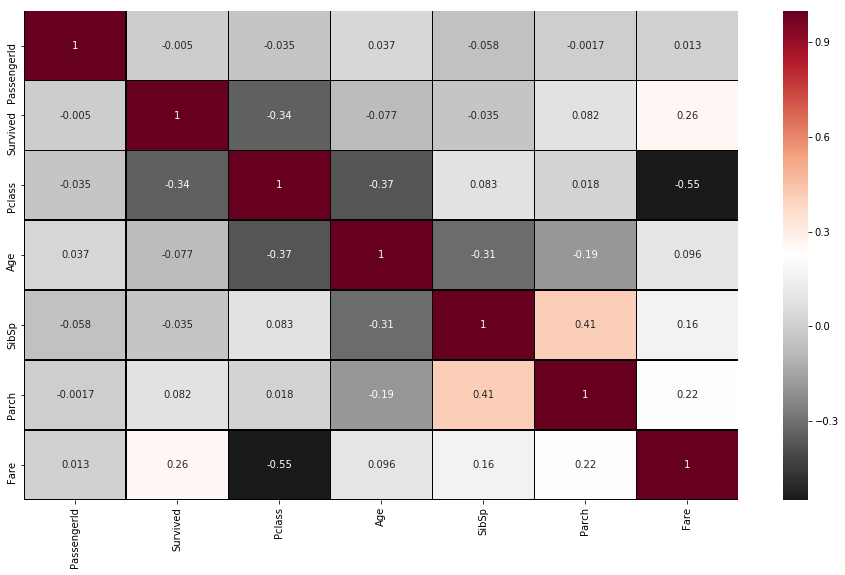

In [9]:
%matplotlib inline

plt.figure(figsize=(16,9))
sns.heatmap(train_df.corr(), annot=True, linewidths=0.5, linecolor='black', cmap='RdGy_r')
plt.xticks(rotation=90)
plt.show()

In [10]:
train_df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sage, Mr. Frederick",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Verificando a quantidade de linhas vazias para cada coluna

In [11]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### No nosso dataset temos 891 linhas 


Observei que para a idade temos 177 linhas que nao possuem idade
estou supondo que a idade e importante para a sobrevivencia.
Assim vou preencher a idade de forma a nao deixar vazio.
 
Na coluna cabine temos 687 linhas vazias, presumo que seja um dado irrelavante
uma vez que temos a classe do passageiro.




### Obtendo a media de idade para poder preencher as linhas de idade nulas

In [12]:
mode(train_df['Age']).mode[0]

24.0

In [13]:
mode(test_df['Age']).mode[0]

21.0

#### inputando a media de idade para as linhas vazias

In [14]:
train_df['Age'].fillna(mode(train_df['Age']).mode[0], inplace=True)

In [15]:
test_df['Age'].fillna(mode(test_df['Age']).mode[0], inplace=True)

Preenchendo valores vazio na tarifa



In [17]:
train_df['Fare'].fillna(train_df['Fare'].mean(), inplace=True)

In [18]:
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

# Analise de sobrevivente dividido por classes

#### Grafico dos sobreviventes por clase

In [19]:
print("Percentual de sobreviventes: 1 Classe:", train_df["Survived"][train_df["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentual de sobreviventes: 2 Classe:", train_df["Survived"][train_df["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentual de sobreviventes: 3 Classe:", train_df["Survived"][train_df["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentual de sobreviventes: 1 Classe: 62.96296296296296
Percentual de sobreviventes: 2 Classe: 47.28260869565217
Percentual de sobreviventes: 3 Classe: 24.236252545824847


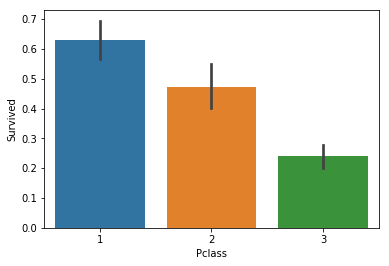

In [20]:
sns.barplot(x="Pclass", y="Survived", data=train_df)

### Vamos deixas as informações mais claras removendo as informações que nao seram uteis nas analises
###### Julgamos que estas variaveis nao serao de grande impacto para nosso modelo
#### Ticket, Cabin e PassegerId



In [21]:
train_df.drop(['Ticket','Cabin','PassengerId'], axis=1, inplace = True)

In [22]:
test_df.drop(['Ticket','Cabin','PassengerId'], axis=1, inplace = True)

In [23]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [24]:
#agora precisamos preencher os valores ausentes no recurso Embarcado
print("Number of people embarking in Southampton (S):")
southampton = train_df[train_df["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train_df[train_df["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train_df[train_df["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


##### Como a maioria das pessoas embarcaram no portao de Southampton, vamos preencher os nulos como Southampton

In [25]:
train_df = train_df.fillna({"Embarked": "S"})

In [26]:
test_df = test_df.fillna({"Embarked": "S"})

In [27]:
train_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

##### Precisamos que as variaveis Sex e Embarked sejam numericas, assim vamos deixar elas binarias

In [28]:
train_df = pd.get_dummies(train_df, dummy_na=True, columns=['Sex','Embarked'])

In [29]:
test_df = pd.get_dummies(test_df, dummy_na=True, columns=['Sex','Embarked'])

In [30]:
display(train_df.head())

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Sex_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,1,0,0,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,0,1,0,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,0,0,1,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,1,0,0,0,1,0


#### Removendo Colunas Vazias

In [31]:
train_df.drop(['Sex_nan','Embarked_nan'], axis=1, inplace = True)

In [32]:
test_df.drop(['Sex_nan','Embarked_nan'], axis=1, inplace = True)

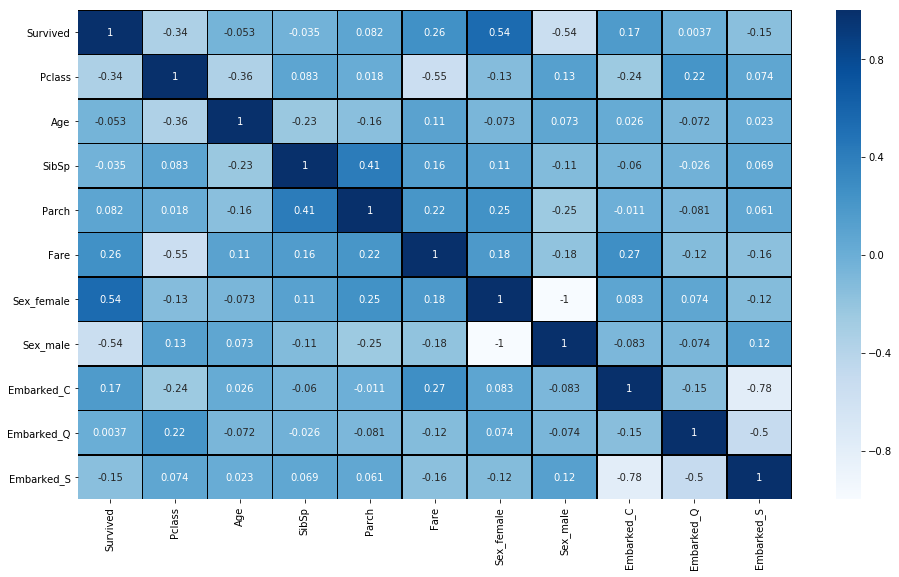

In [33]:
%matplotlib inline

plt.figure(figsize=(16,9))
sns.heatmap(train_df.corr(), annot=True, linewidths=0.5, linecolor='black', cmap='Blues')
plt.xticks(rotation=90)
plt.show()

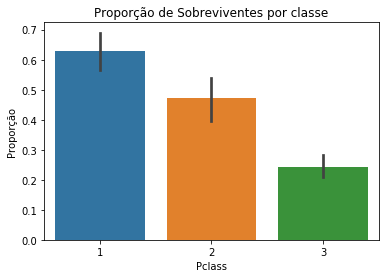

In [34]:
#Agrupando a proporção de sobrevivente por classe e gerando um gráfico a partir do resultado

sobreviventes_classe = train_df.copy()
sobreviventes_classe['Survived'] = train_df['Survived'] == 1

sns.barplot(data=sobreviventes_classe, x="Pclass", y="Survived")

plt.title('Proporção de Sobreviventes por classe')
plt.ylabel('Proporção')
plt.show()

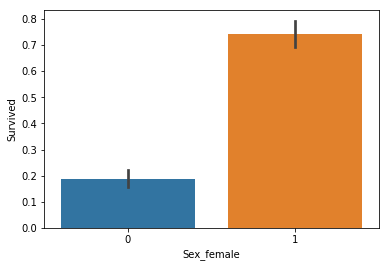

In [35]:
sns.barplot(x="Sex_female", y ="Survived", data=train_df)


In [36]:
for name_string in train_df['Name']:
    train_df['Title']=train_df['Name'].str.extract('([A-Za-z]+)\.',expand=True)
    
    

#replacing the rare title with more common one.
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
train_df.replace({'Title': mapping}, inplace=True)

train_df['Title'].value_counts()

Mr        525
Miss      186
Mrs       127
Master     40
Dr          7
Rev         6
Name: Title, dtype: int64

#### Discretizando a tarifa

In [37]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [38]:
def discrete_fare(fare):
    if np.isnan(fare):
        return fare
    elif fare <= 7.8958:
        return 0
    elif fare <= 14.4542:
        return 1
    elif fare <= 31.275:
        return 2
    else:
        return 3

train_df["Discrete Fare"] = train_df.apply(lambda row: discrete_fare(row["Fare"]), axis=1)
train_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title,Discrete Fare
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,1,0,0,1,Mr,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,1,0,0,Mrs,3
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,0,1,Miss,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,0,1,Mrs,3
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,1,0,0,1,Mr,1


In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Sex_female       891 non-null uint8
Sex_male         891 non-null uint8
Embarked_C       891 non-null uint8
Embarked_Q       891 non-null uint8
Embarked_S       891 non-null uint8
Title            891 non-null object
Discrete Fare    891 non-null int64
dtypes: float64(2), int64(5), object(2), uint8(5)
memory usage: 67.1+ KB


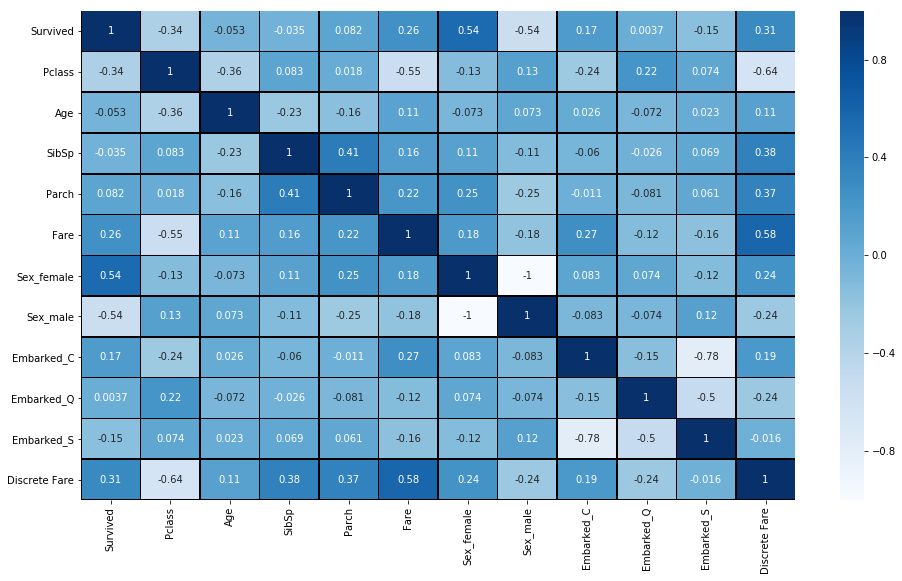

In [40]:
%matplotlib inline

plt.figure(figsize=(16,9))
sns.heatmap(train_df.corr(), annot=True, linewidths=0.5, linecolor='black', cmap='Blues')
plt.xticks(rotation=90)
plt.show()

## Relatório de Análise Exploratória com o pandas_profiling

Vamos visualizar agora algumas informações sobre esse dataset com o pandas_profiling que facilita todo o processo de obter informações sobre o dataset:

In [41]:
pp.ProfileReport(train_df)

Number of variables,14
Number of observations,891
Total Missing (%),0.0%
Total size in memory,67.1 KiB
Average record size in memory,77.1 B
Numeric,6
Categorical,1
Boolean,6
Date,0
Text (Unique),1
Rejected,0


In [42]:
train_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title,Discrete Fare
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,1,0,0,1,Mr,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,1,0,0,Mrs,3
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,0,1,Miss,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,0,1,Mrs,3
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,1,0,0,1,Mr,1


### Separação dos dados de treino e classe


_**Definição da classe:**_ O que queremos descobrir nesse estudo? Se o tripulante do titanic sobreviveu ou nao <br>


In [43]:
classe = train_df['Survived']

Separação das variaveis do modelo (features) - Somente os dados numéricos considerados relevantes, no caso as variáveis definidas anteriormente: ['Pclass', 'Age', 'Sex_famale', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [44]:
#Definição do dataset de treino somente com as informações relevantes para treinar o modelo
features = ['Pclass','Age','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','SibSp','Fare','Parch']
x_train = train_df[features]

Vamos selecionar os dados de teste contendo somente as features necessárias a análise:

In [45]:
x_test = test_df[features]

In [46]:
# Criando o objeto RandomForest
rf = RandomForestRegressor(random_state=42, n_estimators=200).fit(x_train,classe)
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [47]:
# Score do classificador usando a métrica R-quadrado (coeficiente de determinação)
rf.score(x_train,classe)

0.886327107042679

In [48]:
sobreviventes = rf.predict(x_test)

In [49]:
df_resposta['Survived'] = np.around(sobreviventes,2)

In [50]:
#Exemplos de sobreviventes
df_resposta['Survived'].unique()

array([0.14, 0.6 , 0.68, 0.47, 0.09, 0.11, 0.94, 0.04, 0.  , 0.12, 1.  ,
       0.34, 0.95, 0.07, 0.69, 0.66, 0.18, 0.78, 0.46, 0.63, 0.58, 0.36,
       0.02, 0.1 , 0.72, 0.41, 0.06, 0.52, 0.16, 0.01, 0.23, 0.67, 0.33,
       0.27, 0.86, 0.08, 0.88, 0.64, 0.87, 0.03, 0.24, 0.26, 0.38, 0.7 ,
       0.93, 0.22, 0.29, 0.15, 0.96, 0.54, 0.98, 0.35, 0.13, 0.2 , 0.49,
       0.92, 0.97, 0.19, 0.42, 0.28, 0.05, 0.44, 0.84, 0.4 , 0.56, 0.5 ,
       0.8 , 0.53, 0.51, 0.31, 0.32, 0.55, 0.99, 0.85, 0.3 , 0.48, 0.65,
       0.9 , 0.77, 0.57, 0.82, 0.59])

In [51]:
sobreviventes

array([0.13625   , 0.14      , 0.6       , 0.685     , 0.47      ,
       0.08583333, 0.10944444, 0.0925    , 0.935     , 0.035     ,
       0.        , 0.12133333, 1.        , 0.345     , 1.        ,
       0.95125   , 0.07042857, 0.69      , 0.655     , 0.18      ,
       0.47      , 0.778     , 1.        , 0.455     , 0.94      ,
       0.        , 1.        , 0.63      , 0.58466667, 0.36      ,
       0.015     , 0.10575   , 0.785     , 0.1       , 0.72      ,
       0.41      , 0.065     , 0.035     , 0.0425    , 0.52066667,
       0.15583333, 0.51590476, 0.0875    , 1.        , 0.995     ,
       0.01416667, 0.23075   , 0.12258887, 0.995     , 0.67      ,
       0.3292381 , 0.27      , 0.935     , 0.86      , 0.41      ,
       0.08      , 0.00625   , 0.005     , 0.005     , 1.        ,
       0.07166667, 0.41064286, 0.00881779, 0.87722222, 0.645     ,
       0.86791667, 0.86      , 0.03      , 0.16      , 0.945     ,
       0.87414642, 0.        , 0.235     , 0.26333333, 1.     

In [52]:
test_df.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",34.5,0,0,7.8292,0,1,0,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,1,0,0,0,1
2,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,0,1,0,1,0
3,3,"Wirz, Mr. Albert",27.0,0,0,8.6625,0,1,0,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,1,0,0,0,1


In [53]:
df_resposta.to_csv('datasets/sobreviu.csv', index=True, header=True)

In [57]:
# Salvar o modelo preditivo
joblib.dump(rf, 'rf_regressor.pkl')

 #Usar/carregar o modelo preditivo
rf2 = joblib.load('rf_regressor.pkl')
rf2.predict(x_test)

array([0.13625   , 0.14      , 0.6       , 0.685     , 0.47      ,
       0.08583333, 0.10944444, 0.0925    , 0.935     , 0.035     ,
       0.        , 0.12133333, 1.        , 0.345     , 1.        ,
       0.95125   , 0.07042857, 0.69      , 0.655     , 0.18      ,
       0.47      , 0.778     , 1.        , 0.455     , 0.94      ,
       0.        , 1.        , 0.63      , 0.58466667, 0.36      ,
       0.015     , 0.10575   , 0.785     , 0.1       , 0.72      ,
       0.41      , 0.065     , 0.035     , 0.0425    , 0.52066667,
       0.15583333, 0.51590476, 0.0875    , 1.        , 0.995     ,
       0.01416667, 0.23075   , 0.12258887, 0.995     , 0.67      ,
       0.3292381 , 0.27      , 0.935     , 0.86      , 0.41      ,
       0.08      , 0.00625   , 0.005     , 0.005     , 1.        ,
       0.07166667, 0.41064286, 0.00881779, 0.87722222, 0.645     ,
       0.86791667, 0.86      , 0.03      , 0.16      , 0.945     ,
       0.87414642, 0.        , 0.235     , 0.26333333, 1.     